In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
data = {
    'Study_Hours': [2,3,4,5,6,7,8,9,10,11],
    'Attendance': [60,65,70,72,75,80,85,88,90,95],
    'Pass': [0,0,0,1,1,1,1,1,1,1]
}

df = pd.DataFrame(data)


In [3]:
X = df[['Study_Hours', 'Attendance']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [5]:
models = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf
}

for name, pred in models.items():
    print(f"\n📘 {name}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))



📘 Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


📘 Decision Tree
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


📘 Random Forest
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0      

In [6]:
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

comparison = pd.DataFrame(list(accuracy_scores.items()), columns=["Model", "Accuracy"])
print("\n✅ Model Comparison:\n", comparison)



✅ Model Comparison:
                  Model  Accuracy
0  Logistic Regression       1.0
1        Decision Tree       1.0
2        Random Forest       1.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparison DataFrame example
# comparison = pd.DataFrame({
#     "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
#     "Accuracy": [0.95, 0.98, 1.00]
# })



/tmp/ipython-input-1781176702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=comparison, palette="coolwarm")


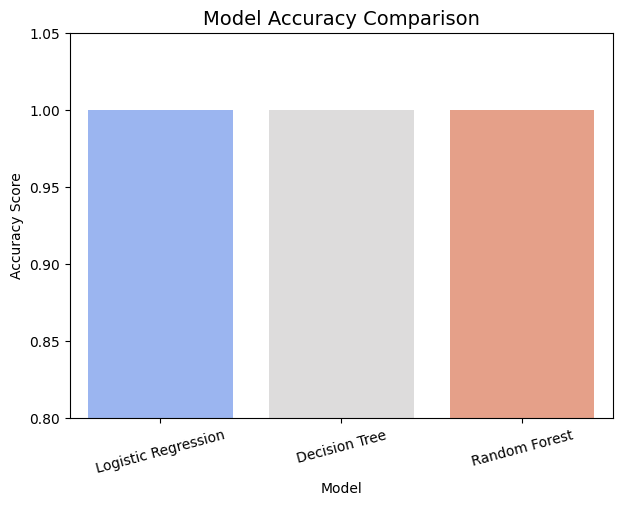

In [8]:
plt.figure(figsize=(7,5))
sns.barplot(x="Model", y="Accuracy", data=comparison, palette="coolwarm")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy Score")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=15)
plt.show()


/tmp/ipython-input-1630930199.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=importance, palette="viridis")


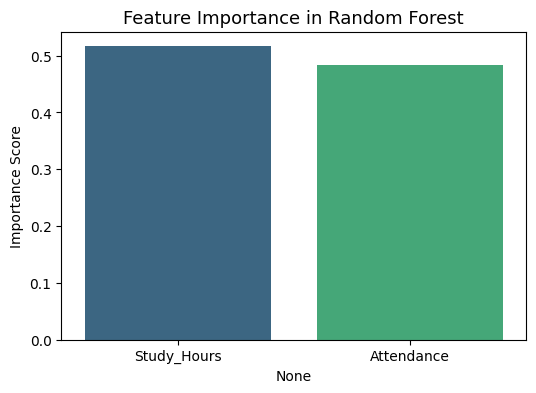

In [9]:
import numpy as np

importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=features, y=importance, palette="viridis")
plt.title("Feature Importance in Random Forest", fontsize=13)
plt.ylabel("Importance Score")
plt.show()
